In [1]:
pip install scikit-fuzzy

In [2]:
# library 
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt 

In [3]:
#Input [Antecedent] and output [Consequent] variable P->Q
speed=ctrl.Antecedent(np.arange(0,181,1),'speed')
dist=ctrl.Antecedent(np.arange(0,501,1),'dist')
bp=ctrl.Consequent(np.arange(0,101,1),'bp')


C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


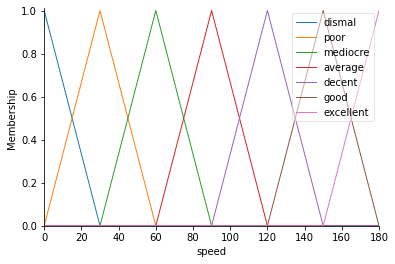

In [7]:
# fuzzyfication [automf]
# automf-generate fuzzymembership automatically
speed.automf(3) # 3 membership variable
#speed.view()
speed.automf(5) # 5 membership variable
#speed.view()
speed.automf(7) # 7 membership variable
speed.view()

C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


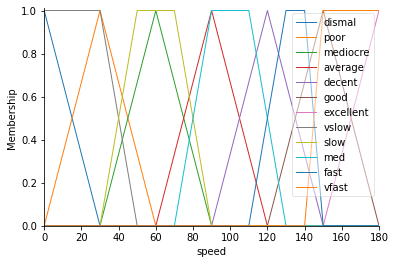

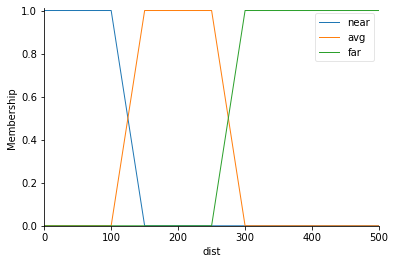

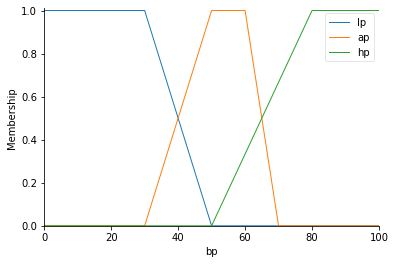

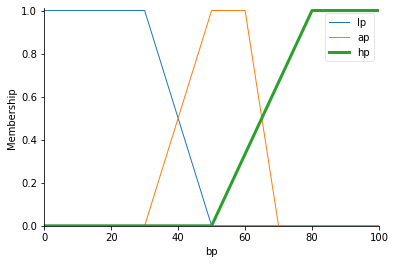

In [9]:
# user defined membership function
speed['vslow']=fuzz.trapmf(speed.universe,[0,0,30,50])
speed['slow']=fuzz.trapmf(speed.universe,[30,50,70,90])
speed['med']=fuzz.trapmf(speed.universe,[70,90,110,130])
speed['fast']=fuzz.trapmf(speed.universe,[110,130,140,150])
speed['vfast']=fuzz.trapmf(speed.universe,[140,150,180,180])
speed.view()
dist['near']=fuzz.trapmf(dist.universe,[0,0,100,150])
dist['avg']=fuzz.trapmf(dist.universe,[100,150,250,300])
dist['far']=fuzz.trapmf(dist.universe,[250,300,500,500])
dist.view()
bp['lp']=fuzz.trapmf(bp.universe,[0,0,30,50])
bp['ap']=fuzz.trapmf(bp.universe,[30,50,60,70])
bp['hp']=fuzz.trapmf(bp.universe,[50,80,100,100])
bp.view()
bp['hp'].view() # plot only hp of bp

In [11]:
# Design set rules [Knowledge base]
rule1=ctrl.Rule(speed['vslow'] & dist['far'], bp['lp'])
rule2=ctrl.Rule(speed['vfast'] | dist['near'], bp['hp'])
rule3=ctrl.Rule(speed['fast'] | dist['near'], bp['hp'])
rule4=ctrl.Rule(speed['vslow'] | dist['far'], bp['lp'])
rule5=ctrl.Rule(speed['med'] | dist['avg'], bp['ap'])


In [12]:
# FIS system
bp_controller=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
bpsc=ctrl.ControlSystemSimulation(bp_controller)

In [13]:
#Compute the break-power at speed =120km/hr and distance=50m.
bpsc.input['speed']=120
bpsc.input['dist']=50
bpsc.compute()
print(bpsc.output['bp'])

72.92792792792793


C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


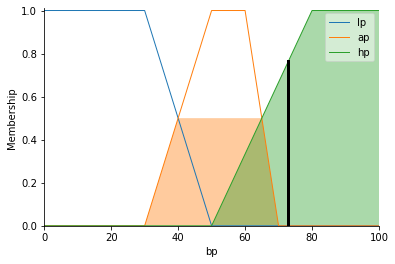

In [14]:
bp.view(sim=bpsc)

In [27]:
#Input [Antecedent] and output [Consequent] variable P->Q
Dirty=ctrl.Antecedent(np.arange(0,30,1),'Dirty')
Stime=ctrl.Antecedent(np.arange(0,10,1),'Stime')
wt=ctrl.Consequent(np.arange(0,15,1),'wt')

C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


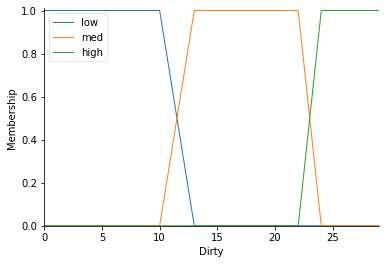

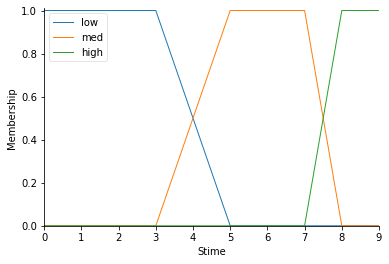

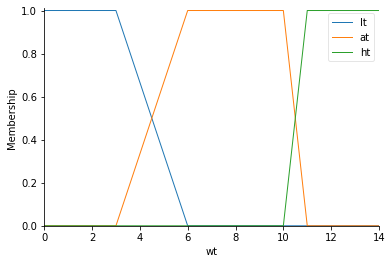

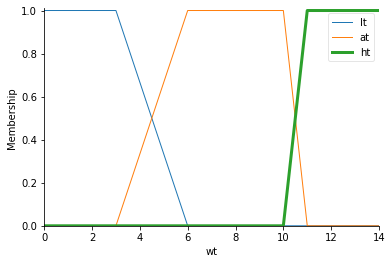

In [28]:
# user defined membership function

Dirty['low']=fuzz.trapmf(Dirty.universe,[0,0,10,13])
Dirty['med']=fuzz.trapmf(Dirty.universe,[10,13,22,24])
Dirty['high']=fuzz.trapmf(Dirty.universe,[22,24,30,30])

Dirty.view()
Stime['low']=fuzz.trapmf(Stime.universe,[0,0,3,5])
Stime['med']=fuzz.trapmf(Stime.universe,[3,5,7,8])
Stime['high']=fuzz.trapmf(Stime.universe,[7,8,10,10])
Stime.view()
wt['lt']=fuzz.trapmf(wt.universe,[0,0,3,6])
wt['at']=fuzz.trapmf(wt.universe,[3,6,10,11])
wt['ht']=fuzz.trapmf(wt.universe,[10,11,15,15])
wt.view()
wt['ht'].view() # plot only hp of bp

In [37]:
rule1=ctrl.Rule(Dirty['low'] & Stime['low'], wt['lt'])
rule2=ctrl.Rule(Dirty['med'] & Stime['med'], wt['at'])
rule3=ctrl.Rule(Dirty['high'] & Stime['high'], wt['ht'])
rule4=ctrl.Rule(Dirty['high'] | Stime['high'], wt['ht'])
rule5=ctrl.Rule(Dirty['med'] | Stime['med'], wt['at'])

In [38]:
# FIS system
wt_controller=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5 ])
wtsc=ctrl.ControlSystemSimulation(wt_controller)

In [42]:
wtsc.input['Dirty']=21
wtsc.input['Stime']=7
wtsc.compute()
print(wtsc.output['wt'])

7.444444444444444


C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


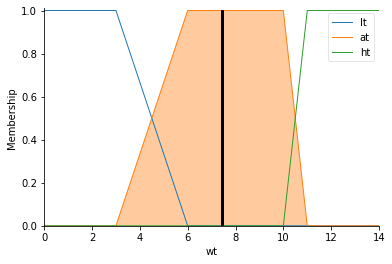

In [43]:
wt.view(sim=wtsc)